# Lab 8: Laboratory Notes - Week 8: Clustering and Classification

As we approach the end parts of our standard life cycle, we will relook at most of what we have covered in lectures and previous tutorials through experiencing some clustering with k-means and classification with decision trees.  The laboratory for this week will include what you have already done, e.g.,

* Data Auditing  
* Normalisation  
* Training and Testing Dataset Split  
* Visualisation  

At the end, you can also explore some tools, especially cloud machine learning services (which change very frequently, so you will need to keep updated on them regularly - and also the links provided may be outdated - last checked 7 March 2025).

Through Week 9 Laboratory exercises, in addition to experimenting with k-means, and Decision Trees (DT), we will also focus a little on understanding the measurement metrics and do share with your peers on how you interpret these metrics for a stakeholder's understanding and more importantly for a stakeholder's appreciation of the outcome.

## Clustering with k-means

We will start Week 9 with clustering. This is an area of unsupervised machine learning, where there is no training and testing of the models but models are built by finding patterns within the dataset.  We will use the k-means clustering algorithm for this activity.

### Understanding Clustering (k-means)

We will illustrate a clustering task using k-means clustering in a 2-dimensional space. We will not look at the theory of k-means clustering; we will just use it as a black box in order to understand some fundamental concepts of segmentation and clustering. So this is a tutorial without mathematics (I know I repeat this a lot, but just wanted to ensure that we are focused on the Life Cycle and not the mathematics behind the algorithms). Now it's important to realise that in data science you will rarely use simple 2-dimensional modelling. However, the simple nature of the material means we can carefully study the different aspects of learning.

#### k-means Clustering

The goal in k-means clustering is to find k subgroups in a given dataset. Please note the variable k represents the number of subgroups in the data. k-means assigns each data point in the dataset to one of the k subgroups iteratively based on the variables (features) in the dataset.  The pseudo-code (algorithm) of k-means works as:

1) Choose the number of clusters (k)  
2) Randomly choose the initial centroids c1, c2, ..... ck  
3) For each data point xi:
* find the nearest centroid (c1, c2, ..... ck) and assign the data point to that cluster
4) For each cluster j = 1..k
* Move/discover a new centroid where the centroid is the mean of all data points assigned to that cluster
5) Repeat steps 3 and 4 until convergence or until the end of a fixed number of iterations

The output of the k-means clustering are:

* k cluster centroids. The centroids can be used to find the relevant subgroup for a new data point.
* Cluster assignment (also called labels in this case but not to be confused with labels for supervised machine learning) for all data points in the given dataset.

<span style="color:red">import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
""" This is a library we import to run the K-means clustering algorithm as a blackbox"""  
""" For more information please see: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"""  
from sklearn.cluster import KMeans</span>

Load the dataset from Canvas 

<span style="color:red">""" We use the standard Iris dataset that is very popular for learning clustering."""
iris_data = pd.read_csv("iris.csv")</span>

As usual, we will look at the data and also the size of the dataset, e.g, check the dataset dimension

<span style="color:red">iris_data.shape</span>

Let's have a look at a single sample data (instead of head() or tail().

<span style="color:red">iris_data.sample()</span>

Column names

<span style="color:red">iris_data.columns</span>

How about if we look at the description, since most of the data are numeric (except probably the label). Do note that this dataset has labels but we aren't going to use it for classification, which you can as an extra exercise.

<span style="color:red">iris_data.describe()</span>

Visualise  
Let’s have a visual look at our data points.

<span style="color:red">%matplotlib inline  
plt.scatter(x=iris_data['sepalwidth'],y=iris_data['sepallength'])  
plt.xlabel('Sepal Width (cm)')  
plt.ylabel('Sepal Length (cm)')</span>

![P1](picture/P1.png)

From a manual inspection of the data points, we probably can see 2 or 3 groups.  We proceed to ask the machine to learn from the input data to determine the groupings. First thing to note is that for k-means, the machine learning algorithm does not know how many clusters it should determine and the default k-means algorithm expects the user to provide that information.

<span style="color:red">""" Run the K-means clustering over the dataset using only distance and speeding features. Set K=2: we only want to cluster the dataset into two subgroups"""  
kmeans = KMeans(n_clusters=2).fit(</span>  
<p style="margin-left: 40px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<span style="color:red">)</span>  

Similarly to how we do data auditing, prior to visualisation, we may want to have a look at some of the results of the clustering.

Look at the outputs: Two cluster centers (this is known as the cluster centroids)

<span style="color:red">kmeans.cluster_centers_</span>

Look at the outputs: Cluster labels.  With k = 2, we will have the labels 0 and 1 to indicate which cluster the data points belong to.

<span style="color:red">kmeans.labels_</span>

Visualise k-means output  
Visualise the output labels

<span style="color:red">plt.scatter(</span>  
<p style="margin-left: 40px;"><span style="color:red">x=iris_data['sepalwidth'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">y=iris_data['sepallength'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">c=kmeans.labels_)</span></p>  

Visualise the cluster centers (black stars)

<span style="color:red">plt.plot(</span>  
<p style="margin-left: 40px;"><span style="color:red">kmeans.cluster_centers_[:,0],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">kmeans.cluster_centers_[:,1],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">'k*',</span></p>  
<p style="margin-left: 40px;"><span style="color:red">markersize=20</span></p>  
<span style="color:red">)  

plt.xlabel('SepalWidth')  
plt.ylabel('SepalLength')  
plt.show()</span>  

#### Exercise 8.1:

Does it look similar to what we envisaged for 2 clusters?

Let’s try to run k-means with different k values to get more clusters.

<span style="color:red">""" Run K-means with another K value"""  
""" Set K=4: we want to cluster the dataset into four subgroups"""  
kmeans2 = KMeans(n_clusters=4).fit(</span>  
<p style="margin-left: 40px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<span style="color:red">)</span>  

Visualise the output labels

<span style="color:red">plt.scatter(</span>  
<p style="margin-left: 40px;"><span style="color:red">x=iris_data['sepalwidth'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">y=iris_data['sepallength'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">c=kmeans2.labels_</span></p>  
<span style="color:red">)</span>  

Visualise the cluster centers (black stars)

<span style="color:red">plt.plot(</span>  
<p style="margin-left: 40px;"><span style="color:red">kmeans2.cluster_centers_[:,0],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">kmeans2.cluster_centers_[:,1],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">'k*',</span></p>  
<p style="margin-left: 40px;"><span style="color:red">markersize=20</span></p>  
<span style="color:red">)</span>  

<span style="color:red">plt.xlabel('SepalWidth')  
plt.ylabel('SepalLength')  
plt.show()</span>  

k-means starts with a random positioning for the cluster centres (centroids) and then it computes the distance between the points on the centroid.  As mentioned earlier in our classes, the randomness is pseudo random and we can re-produce it each time by setting a seed.  In this case, let's try to add the parameter init='random' for the k-means initialisation.

<span style="color:red">kmeans2 = KMeans(n_clusters=4, init='random').fit(</span>  
<p style="margin-left: 40px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<span style="color:red">)</span>  

and run it multiple times.

<span style="color:red">kmeans2 = KMeans(n_clusters=4, init='random').fit(</span>  
<p style="margin-left: 40px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<span style="color:red">)</span>  

<span style="color:red">plt.scatter(</span>  
<p style="margin-left: 40px;"><span style="color:red">x=iris_data['sepalwidth'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">y=iris_data['sepallength'],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">c=kmeans2.labels_)</span></p>  

#### Exercise 8.2:

Does the clustering change? Why?

Visualise the cluster centers (black stars)

<span style="color:red">plt.plot(</span>  
<p style="margin-left: 40px;"><span style="color:red">kmeans2.cluster_centers_[:,0],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">kmeans2.cluster_centers_[:,1],</span></p>  
<p style="margin-left: 40px;"><span style="color:red">'k*',</span></p>  
<p style="margin-left: 40px;"><span style="color:red">markersize=20</span></p>  
<span style="color:red">)</span>

<span style="color:red">plt.xlabel('SepalWidth')</span>  
<span style="color:red">plt.ylabel('SepalLength')</span>  
<span style="color:red">plt.show()</span>

## Measurement for Clustering

How good is our cluster?  There are actually 2 questions in this but we look at something termed as inertia.  In clustering for k-means, the inertia measures how well a dataset was clustered. It is the measurement of the the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

<span style="color:red">kmeans.inertia_</span>

A good model is one with low inertia and a low number of clusters.  It is a combination of both for a good measure.  The second question is actually what's the best number for k?  There are 2 common ways to determine the best k.  Do note that for larger k, the inertia will typically be lower due to the distance between points and centroid will be smaller, hence it is low inertia AND low k.  The two common ways to determine the number of clusters are (1) Elbow (sometimes known as Knee) method, and (2) Silhouette Method.

### Elbow Analysis (Method)

We first get the error function, which from the inertia, we will use the sum of the squared distances.

<span style="color:red">sum_of_squared_distances = []  
k = range(2,9)</span>

Then we plot for each cluster size chosen (k value), the error function (or inertia).

<span style="color:red">for nclusters in k:</span>  
<p style="margin-left: 40px;"><span style="color:red">kmeans = KMeans(n_clusters=nclusters).fit(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<p style="margin-left: 40px;"><span style="color:red">)</span></p>  
<p style="margin-left: 40px;"><span style="color:red">sum_of_squared_distances.append(kmeans.inertia_)</span></p>

We then visually (manually) identify the elbow (or knee) point.  This is the point where the gradient plateaus significantly.  You can actually measure the tangent of each and decide but a visual look is sufficient.

<span style="color:red">plt.plot(k, sum_of_squared_distances, 'b-')  
plt.xlabel('Values of k')  
plt.ylabel('Sum of Squared Distance')  
plt.title('Elbow Analysis for Optimal k')  
plt.show()</span>

![P2](picture/P2.png)

### Silhouette Method

A more "scientific" method would be to use the silhouette score.  (Caveat: From my personal point of view, this is not a good measure but I am including it here as it is a method used relatively widely).  We first import the function from the library.

<span style="color:red">from sklearn.metrics import silhouette_score</span>

Again, we initialise our coding.

<span style="color:red">silhouette_avg = []  
k = range(2,9)</span>

Similarly to the above, we want to visually look at the silhouette score (but we really don't need do, as we can just get the max() value).

<span style="color:red">for nclusters in k:</span>  
<p style="margin-left: 40px;"><span style="color:red">kmeans = KMeans(n_clusters=nclusters).fit(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">iris_data[['sepalwidth','sepallength']]</span></p>  
<p style="margin-left: 40px;"><span style="color:red">)</span></p>  
<p style="margin-left: 40px;"><span style="color:red">cluster_labels = kmeans.labels_</span></p>  
<p style="margin-left: 40px;"><span style="color:red">silhouette_avg.append(silhouette_score(iris_data[['sepalwidth','sepallength']], cluster_labels))</span></p>  

Visuals

<span style="color:red">plt.plot(k, silhouette_avg, 'b-')  
plt.xlabel('Values of k')  
plt.ylabel('Silhouette Score')  
plt.title('Silhouette Score Analysis for Optimal k')  
plt.show()</span>  

The higher the silhouette score, the better it is. 

#### Exercise 8.3:

For the above, what's the best number of clusters?  Can you plot and have a visual look whether the clusters make sense.

## Classification with Decision Trees

Our next exercise will be on classification, which is a form of supervised machine learning. Similarly to Linear Regression, we will have a training and a testing dataset (as an aside, do look at what validation datasets are and you can discuss this on the Canvas Discussions).  For this activity, we will be attempting to predict whether a person has travelled abroad based on the person’s age and income.  The dataset is on Canvas and it is called "TravelInfo.csv".  Let’s start with the usual importing of the necessary libraries.

<span style="color:red">import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt</span>  

<span style="color:red">dataset = pd.read_csv('TravelInfo.csv')</span>  

Investigate the content of the dataset (as we would normally), i.e. what are known as the Data Auditing steps.

<span style="color:red">dataset.shape</span>

<span style="color:red">dataset.head()</span>

The dataset should have 400 rows and 3 columns.  The columns should be ‘Age’, ‘Income’ and ‘TravelAbroad’.  This is a record of past incidences or survey data.  As the intention is to build a model, we are going to use this as the training data.

#### Exercise 8.4:

If we use the whole dataset as the training data, how do we know how good our model is?

We proceed to split the dataset into input data and their corresponding labelled data.  The first two columns are the input data, i.e. the ‘Age’ and the ‘Income’ of which we would like to predict if the person has ‘TravelAbroad’ before.  From the past survey data collected, we have some samples and this ‘TravelAbroad’ is the respective labelled data.  Let’s split the data into <span style="color:red">X</span>, the input data and <span style="color:red">y</span>, the labelled data.

<span style="color:red">X = dataset.iloc[:, [0, 1]].values    # Input Data: Age and Income  
y = dataset.iloc[:, 2].values         # Labeled Data: Travelled or not</span>

You can review what <span style="color:red">X</span> and <span style="color:red">y</span> consist of.  Since, we need to reserve a portion of the dataset for testing data, we can either simply take a portion of the data or a better way is take from a “random” sample of the data, assuming that we want to keep 75% for the training data and 25% for the testing data.  We can use the function train_test_split() from sklearn.model_selection. You should already be familiar with this from the Linear Regression exercise from the previous week.

<span style="color:red">from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(</span>  
<p style="margin-left: 40px;"><span style="color:red">X, y, test_size = 0.25, random_state = 0</span></p>  
<span style="color:red">)</span>

Optionally, you can also do the split manually, taking the first 300 rows as the training dataset and the last 100 rows as the testing dataset.  It is very important to note that the training and testing datasets should not have any overlaps.  We will next look at Normalisation, in this case also known as Feature Scaling.

## Normalisation or Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective (the learning algorithm) functions will not work properly without normalisation (a.k.a. feature scaling). For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed (heavily influenced) by this particular feature. Therefore, the range of all features should be normalised in order for each feature to contribute proportionately to the final distance. In addition, our motivation here is to visualise the feature space later on.

Again, we use a built in function StandardScaler() from sklearn.preprocessing to do this. Note that we apply the fit_transform() to the training dataset and not the test dataset.  The reason is that we want to scale it to have a mean of 0 and a certain standard deviation (this is also known as the Z-Score Normalisation - Do note that in Data Science, some of the terms are equivalent and if you know what they do/mean, you will be ok).  The mean and standard deviation values will be stored in the StandardScaler() and applied to the testing dataset using the transform() (later in the code).

<span style="color:red">""" Feature Scaling"""  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)</span>

## Train and Test using Decision Tree Algorithm

Now, our data is ready to be used to build the model.  Note that, in reality, we will usually need to read and wrangle the data before we even start to normalise or standardize the data (although this stage does not necessarily occur in all cases).  Let’s use the Decision Tree algorithm, from sklearn.tree’s DecisionTreeClassifier() function.

<span style="color:red">""" Fitting Decision Tree Classification to the Training set"""  
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier( </span>  
<p style="margin-left: 40px;"><span style="color:red">criterion = 'entropy', random_state = 0</span></p>  
<span style="color:red">)  
classifier.fit(X_train, y_train)</span>  

Normally, when we want to build a model, most functions will have a method called fit() (note that this is not standard but many functions use this).  At the end of running that code, we now have a model using the Decision Tree algorithm and the model is called <span style="color:red">classifier</span> (you can call your model whatever, it does not have to be classifier). Since we now have a model built, let’s test how good our model is.  We firstly use the built model with the testing input data (not labels as that’s the output that we want to check against what we already know).  We use the method predict() in the model.  Note that this method’s name is also quite common with other built-in functions for models, but many also do call this pred().

<span style="color:red">""" Predicting the Test set results"""  
y_pred = classifier.predict(X_test)</span>

## Classifier Measurement using Confusion Matrix

We now have a set of labels, y_pred, that is the output from the prediction of using our testing data.  We now need to compare this y_pred with the actual y_test (the true values) and determine the accuracy of our model’s prediction.  To do so, we want to view it using a confusion matrix.  This is an important concept for classifier comparison.

<span style="color:red">""" Making the Confusion Matrix"""  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm</span>

Your confusion matrix will be shown as a 2 by 2 matrix.

#### Exercise 8.5:

From the confusion matrix output, discuss what are the values of True Negatives, True Positives, False Negatives, and False Positives.  Other than accuracy, would precision or recall be a better measure for this particular case?

## Visualise (not assessed materials)

We will take this opportunity to introduce a new visualisation, called the meshgrid.  For this demonstration, we will look at the test results in the feature space.  You do not need to know the syntax or how it works.  This is just for illustration.

<span style="color:red">""" Visualising the Test set results"""
from matplotlib.colors import ListedColormap  
X_set, y_set = X_test, y_test  
X1, X2 = np.meshgrid(</span>  
<p style="margin-left: 40px;"><span style="color:red">np.arange(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">start = X_set[:, 0].min() - 1,</span></p>  
<p style="margin-left: 80px;"><span style="color:red">stop = X_set[:, 0].max() + 1,</span></p>  
<p style="margin-left: 80px;"><span style="color:red">step = 0.01</span></p>  
<p style="margin-left: 40px;"><span style="color:red">),</span></p>  
<p style="margin-left: 40px;"><span style="color:red">np.arange(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">start = X_set[:, 1].min() - 1,</span></p>  
<p style="margin-left: 80px;"><span style="color:red">stop = X_set[:, 1].max() + 1,</span></p>  
<p style="margin-left: 80px;"><span style="color:red">step = 0.01</span></p>  
<p style="margin-left: 40px;"><span style="color:red">)</span></p>  
<span style="color:red">)</span>  

<span style="color:red">plt.contourf(</span>  
<p style="margin-left: 40px;"><span style="color:red">X1,</span></p>  
<p style="margin-left: 40px;"><span style="color:red">X2,</span></p>  
<p style="margin-left: 40px;"><span style="color:red">classifier.predict(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),</span></p>  
<p style="margin-left: 40px;"><span style="color:red">alpha = 0.75,</span></p>  
<p style="margin-left: 40px;"><span style="color:red">cmap = ListedColormap(('red', 'green'))</span></p>  
<span style="color:red">)</span>  

<span style="color:red">plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())</span>  

<span style="color:red">for i, j in enumerate(np.unique(y_set)):</span>  
<p style="margin-left: 40px;"><span style="color:red">plt.scatter(</span></p>  
<p style="margin-left: 80px;"><span style="color:red">X_set[y_set == j, 0],</span></p>  
<p style="margin-left: 80px;"><span style="color:red">X_set[y_set == j, 1],</span></p>  
<p style="margin-left: 80px;"><span style="color:red">c = ListedColormap(('red', 'green'))(i),</span></p>  
<p style="margin-left: 80px;"><span style="color:red">label = j</span></p>  
<p style="margin-left: 40px;"><span style="color:red">)</span></p>  
    
<span style="color:red">plt.title('Decision Tree Classification (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Income')  
plt.legend()  
plt.show()</span>

## Train and Test using Random Forest Algorithm (extra)

Another classifier is the random forests algorithm, which in essence consists of multiple trees, each based on a random sample of the training data.  They usually perform better than Decision Trees, and such a model is also known as an ensemble method (aggregation from many Decision Trees in this case).  Let’s now fit a Random Forest Classification to the Training set.  The concepts are similar to the above, just that we call a different model.  All the reading of data, splitting of data and data normalization has been done above.

<span style="color:red">""" Fitting Random Forest Classification to the Training set"""  
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(</span>  
<p style="margin-left: 40px;"><span style="color:red">n_estimators = 20,</span></p>  
<p style="margin-left: 40px;"><span style="color:red">criterion = 'entropy',</span></p>  
<p style="margin-left: 40px;"><span style="color:red">random_state = 0</span></p>  
<span style="color:red">)  
classifier.fit(X_train, y_train)</span>  

<span style="color:red">""" Predicting the Test set results"""  
y_pred = classifier.predict(X_test)</span>  

<span style="color:red">""" Making the Confusion Matrix"""  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  
cm</span>

#### Exercise 8.6:

Discuss the results of the above confusion matrix. What is the prediction accuracy? Compare with the decision tree results.

In machine learning algorithms, one way to improve the test accuracy is to tune the parameters (e.g. number of trees in the random forest algorithm).  Tuning based on the parameters of the model building is called hyper-parameter tuning.  Try the above using <span style="color:red">n_estimators = 40</span>.

#### Exercise 8.7:

Do you get better results? 

This comes to the end of our data analytics process but we will continue to look at the deployment of the models next week.

## Exploring Cloud Machine Learning Tools

You have now had some exposure to the basics of machine learning, with some understanding of associative rule mining, linear regression, clustering with k-means, and classifiers such as decision trees and random forest.  These provide you with the basic machine learning foundations.

Other than the tools that are available in Python, many of the cloud platform providers have their own machine learning algorithms available.  Note that like these Python libraries, the algorithms are standard implementations.  As a data scientist, you should have the necessary background to augment these algorithms to maybe suit your needs better.

For the rest of Week 9, you can explore:

* [AWS Machine Learning](https://aws.amazon.com/fr/free/machine-learning/)  
* [Google Cloud AI and Machine Learning](https://cloud.google.com/products/ai)  
* [Microsoft Azure Machine Learning](https://azure.microsoft.com/en-us/pricing/purchase-options/azure-account?icid=machine-learning)  
* [OpenAI API](https://openai.com/api/)  
* [AliCloud Machine Learning](https://www.alibabacloud.com/fr/product/machine-learning?_p_lc=1)  
* [IBM Watson Machine Learning](https://www.ibm.com/products/watsonx-ai)  
* [Huawei ModelArts AI](https://www.huaweicloud.com/intl/en-us/product/modelarts.html)  

You should be able to obtain some free trial credits for some of them, either as a student or as a start-up.

## My code part

#### Understanding Clustering (k-means)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# This is a library we import to run the K-means clustering algorithm as a blackbox
# For more information please see: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [3]:
# We use the standard Iris dataset that is very popular for learning clustering.
iris_data = pd.read_csv("data/iris.csv")

In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.sample()

,sepallength,sepalwidth,petallength,petalwidth,class
144,6.7,3.3,5.7,2.5,Iris-virginica


In [6]:
iris_data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [7]:
iris_data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Visualise

Text(0, 0.5, 'Sepal Length (cm)')

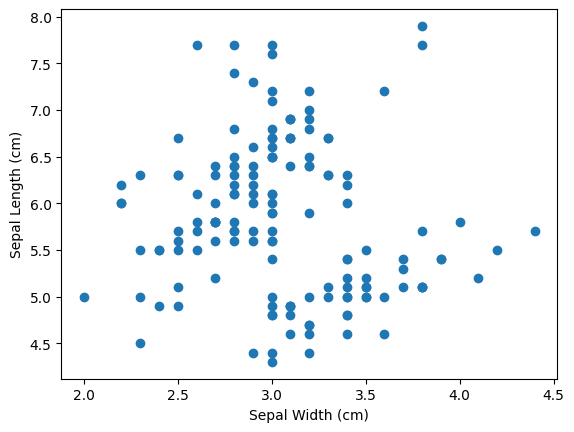

In [8]:
%matplotlib inline
plt.scatter(x=iris_data['sepalwidth'],y=iris_data['sepallength'])
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')

In [11]:
# Run the K-means clustering over the dataset using only
# distance and speeding features. Set K=2: we only want
# to cluster the dataset into two subgroups
kmeans = KMeans(n_clusters=2).fit(
    iris_data[['sepalwidth','sepallength']]
)

In [12]:
kmeans.cluster_centers_

array([[3.1253012 , 5.22409639],
       [2.96567164, 6.61044776]])

In [13]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

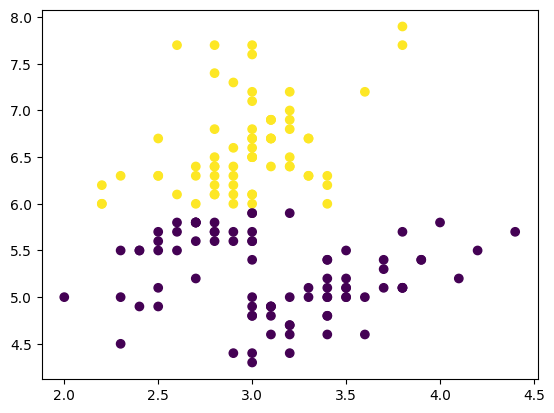

In [14]:
plt.scatter(
    x=iris_data['sepalwidth'],
    y=iris_data['sepallength'], 
    c=kmeans.labels_)

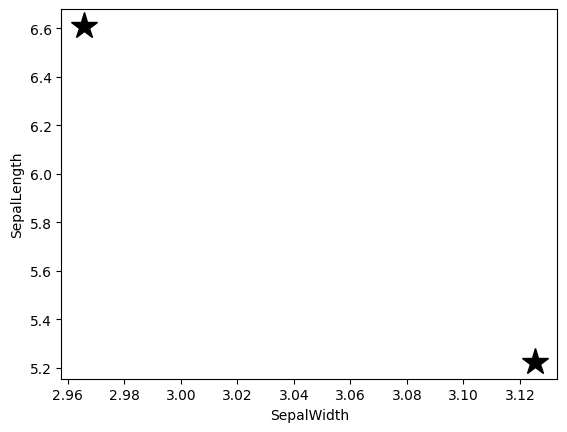

In [15]:
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('SepalWidth')
plt.ylabel('SepalLength')
plt.show()

#### Exercise 8.1: 

In [16]:
# Run K-means with another K value
# Set K=4: we want to cluster the dataset into four subgroups
kmeans2 = KMeans(n_clusters=4).fit(
    iris_data[['sepalwidth','sepallength']]
)

In [17]:
# Run K-means with another K value
# Set K=4: we want to cluster the dataset into four subgroups
kmeans2 = KMeans(n_clusters=4).fit(
    iris_data[['sepalwidth','sepallength']]
)

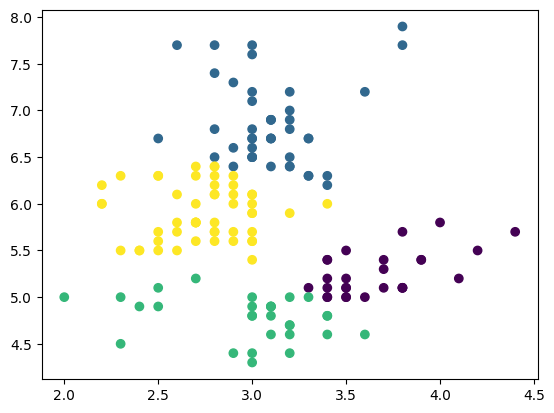

In [18]:
plt.scatter(
    x=iris_data['sepalwidth'],
    y=iris_data['sepallength'], 
    c=kmeans2.labels_
)

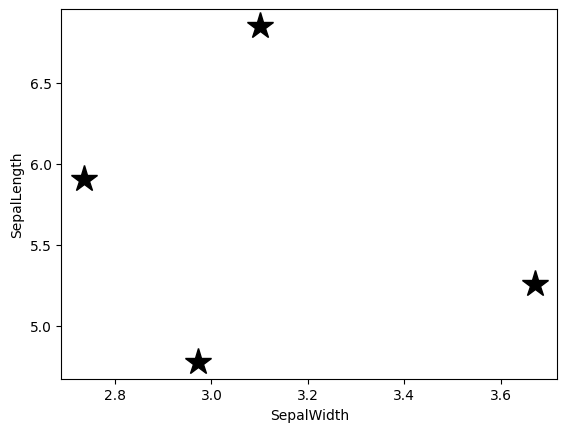

In [19]:
plt.plot(
    kmeans2.cluster_centers_[:,0],
    kmeans2.cluster_centers_[:,1],
    'k*',
    markersize=20
)

plt.xlabel('SepalWidth')
plt.ylabel('SepalLength')
plt.show()

In [20]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
    iris_data[['sepalwidth','sepallength']]
)

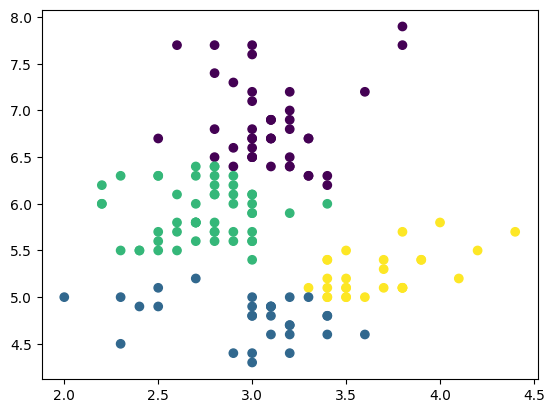

In [21]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
    iris_data[['sepalwidth','sepallength']]
)

plt.scatter(
    x=iris_data['sepalwidth'],
    y=iris_data['sepallength'], 
    c=kmeans2.labels_)

#### Exercise 8.2:

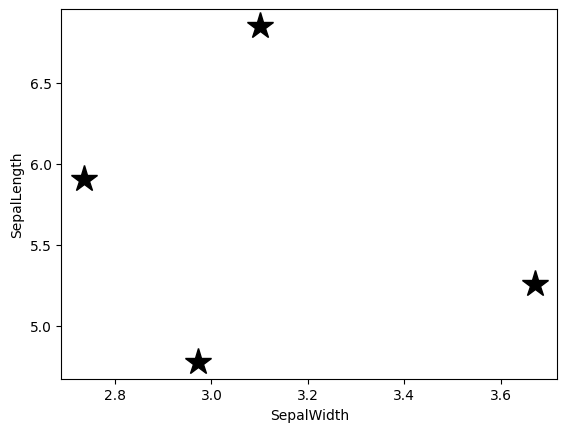

In [22]:
plt.plot(
    kmeans2.cluster_centers_[:,0],
    kmeans2.cluster_centers_[:,1],
    'k*',
    markersize=20
)

plt.xlabel('SepalWidth')
plt.ylabel('SepalLength')
plt.show()

In [23]:
kmeans.inertia_

57.98240604207877

In [24]:
sum_of_squared_distances = []
k = range(2,9)

In [25]:
for nclusters in k:
    kmeans = KMeans(n_clusters=nclusters).fit(
        iris_data[['sepalwidth','sepallength']]
    )
    sum_of_squared_distances.append(kmeans.inertia_)

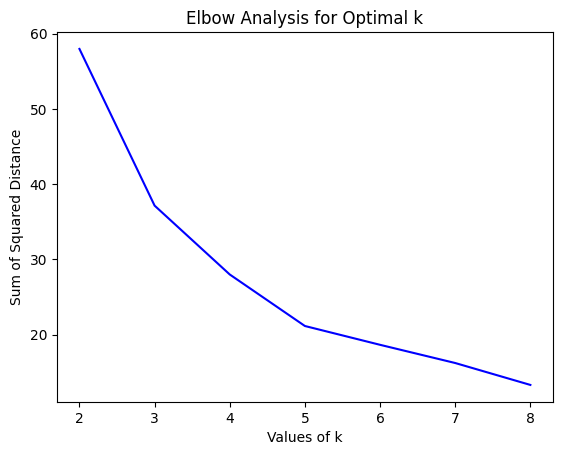

In [26]:
plt.plot(k, sum_of_squared_distances, 'b-')
plt.xlabel('Values of k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Analysis for Optimal k')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_avg = []
k = range(2,9)

In [30]:
for nclusters in k:
    kmeans = KMeans(n_clusters=nclusters).fit(
        iris_data[['sepalwidth','sepallength']]
    )
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(iris_data[['sepalwidth','sepallength']], cluster_labels))

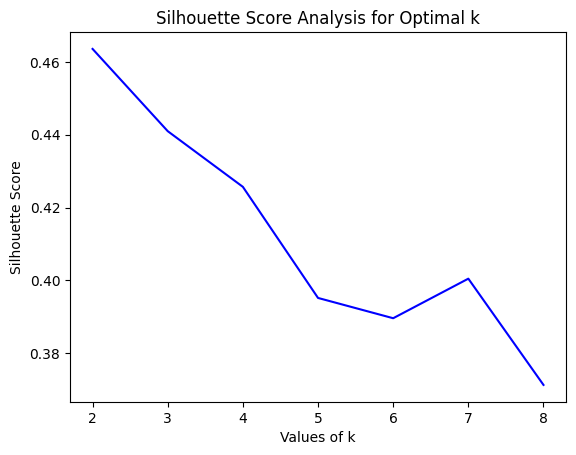

In [31]:
plt.plot(k, silhouette_avg, 'b-')
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for Optimal k')
plt.show()

#### Exercise 8.3:

#### Classification with Decision Trees

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('data/TravelInfo.csv')

In [34]:
dataset.shape

(400, 3)

In [35]:
dataset.head()

,Age,Income,TravelAbroad
0,22,25000,0
1,38,26000,0
2,29,49000,0
3,30,63000,0
4,22,82000,0


#### Exercise 8.4:

In [36]:
X = dataset.iloc[:, [0, 1]].values    # Input Data: Age and Income
y = dataset.iloc[:, 2].values         # Labeled Data: Travelled or not

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0
)

#### Normalisation or Feature Scaling

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train and Test using Decision Tree Algorithm


In [39]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

#### Classifier Measurement using Confusion Matrix

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

#### Exercise 8.5: 

we can determine the values of:

* True Negatives (TN): 62 (correctly predicted negatives)  
* True Positives (TP): 29 (correctly predicted positives)  
* False Negatives (FN): 3 (actual positives incorrectly predicted as negatives)  
* False Positives (FP): 6 (actual negatives incorrectly predicted as positives)

Choosing Between Precision and Recall  
* Precision ((𝑇𝑃)/(𝑇𝑃+𝐹𝑃)) measures how many of the predicted positive cases were actually positive.  
* Recall ((𝑇𝑃)/(𝑇𝑃+𝐹𝑁)) measures how many of the actual positive cases were correctly identified.  

The choice depends on the problem's context:  
* If false positives (FP) are costly (e.g., in medical diagnoses where a false alarm leads to unnecessary tests/treatment), precision is more important.  
* If false negatives (FN) are costly (e.g., in detecting fraud or diseases where missing a positive case is critical), recall is more important.

#### Visualise (not assessed materials)

C:\Users\Framework_Arthur\AppData\Local\Temp\ipykernel_99656\1914125244.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


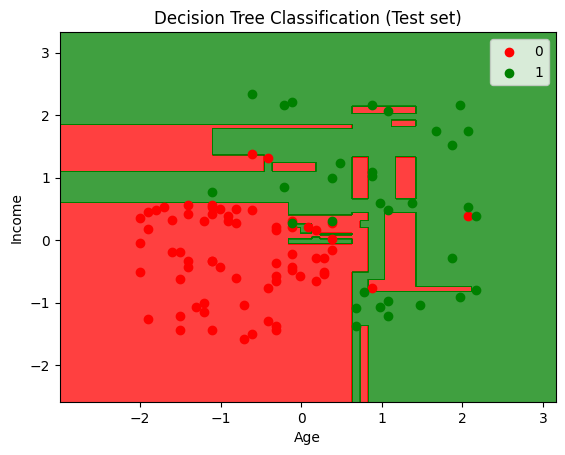

In [42]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(
        start = X_set[:, 0].min() - 1, 
        stop = X_set[:, 0].max() + 1, 
        step = 0.01
    ),
    np.arange(
        start = X_set[:, 1].min() - 1,
        stop = X_set[:, 1].max() + 1,
        step = 0.01
    )
)

plt.contourf(
    X1,
    X2,
    classifier.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], 
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )
    
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

#### Train and Test using Random Forest Algorithm (extra)

In [43]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators = 20,
    criterion = 'entropy',
    random_state = 0
)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]])

#### Exercise 8.6:

Accuracy= ((True Positives+True Negatives)/(Total Predictions)) 

* Decision Tree Accuracy=((62+29)/(62+6+3+29))  
=(91)/(100)  
=91%

* Random Forest Accuracy=((63+29)/(63+5+3+29))  
=(92)/(100)  
=92%


Comparison
* Random Forest has slightly better accuracy (92% vs. 91%) because it makes more accurate negative predictions (63 vs. 62) and fewer false positives (5 vs. 6).
* False negatives (FN) remain the same (3 in both cases), meaning both models handle positive instances similarly.
* Random Forest reduced false positives (5 vs. 6), improving precision for the negative class.

In [44]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators = 40,
    criterion = 'entropy',
    random_state = 0
)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]])

#### Exercise 8.7: 

Comparison with Previous Models

|Model|TN||FP|FN|TP|Accuracy|  
|Decision Tree|62|6|3|29|91%|  
|Random Forest(20 trees)|63|5|3|29|92%|  
|Random Forest(40 trees)|64|4|2|30|94%|  

* Accuracy improved to 94%, a 2% increase from the previous Random Forest model.
* False Positives (FP) decreased from 5 to 4, meaning fewer negative samples were misclassified.
* False Negatives (FN) decreased from 3 to 2, meaning the model correctly identified more positive cases.
* True Positives (TP) increased to 30, improving classification of positive cases.